# Preparing the dataset

## Importing the libraries

In [1]:
#to read the dataframe
import pandas as pd    

#to plot
import matplotlib.pyplot as plt

#to measure the time
import time

#to call mathmatical functions
import math

#to draw tables
from tabulate import tabulate

#to split the dataset into training set and testing set
from sklearn.model_selection import train_test_split

#to run the k-cross validaton 
from sklearn.model_selection import cross_val_score
from sklearn.model_selection import KFold

#for linear regression
from sklearn.linear_model import LinearRegression

#for random forest regression
from sklearn.ensemble import RandomForestRegressor

#for knn regression
from sklearn import neighbors

#for evaluation 
from sklearn import metrics

## Reading the dataset as a dataframe

In [2]:
#reading the dataset in dataframe
df = pd.read_fwf("yacht_hydrodynamics.data")

In [3]:
df.head(5)

,-2.3,0.568,4.78,3.99,3.17,0.125,0.11
0,-2.3,0.568,4.78,3.99,3.17,0.150,0.27
1,-2.3,0.568,4.78,3.99,3.17,0.175,0.47
2,-2.3,0.568,4.78,3.99,3.17,0.200,0.78
3,-2.3,0.568,4.78,3.99,3.17,0.225,1.18
4,-2.3,0.568,4.78,3.99,3.17,0.250,1.82


## Discovering the dataset 

In [4]:
#show the number of null values in each column
df.isnull().sum()

-2.3     1
0.568    1
4.78     1
3.99     1
3.17     1
0.125    1
0.11     1
dtype: int64

In [5]:
#remove the rows that contains null values
#df = df.dropna()
is_NaN = df.isnull()
row_has_NaN = is_NaN.any(axis=1)
rows_with_NaN = df[row_has_NaN]

print(rows_with_NaN)

     -2.3  0.568  4.78  3.99  3.17  0.125  0.11
307   NaN    NaN   NaN   NaN   NaN    NaN   NaN


As the columns' names are numbers and the last row has no records, It could be expected that the dataset was shifted. So we need to fill the null row with the records of the first row.

In [6]:
#filling the last row
record = df.columns.tolist()
for i in range(len(df.columns)):
  df.iloc[307,[i]] = float(record[i]) 

df.tail(1)

,-2.3,0.568,4.78,3.99,3.17,0.125,0.11
307,-2.3,0.568,4.78,3.99,3.17,0.125,0.11


In [7]:
#renaming the dataframe columns
df.columns = ['X1', 'X2', 'X3', 'X4', 'X5', 'X6', 'Y']
df.head(5) 

,X1,X2,X3,X4,X5,X6,Y
0,-2.3,0.568,4.78,3.99,3.17,0.150,0.27
1,-2.3,0.568,4.78,3.99,3.17,0.175,0.47
2,-2.3,0.568,4.78,3.99,3.17,0.200,0.78
3,-2.3,0.568,4.78,3.99,3.17,0.225,1.18
4,-2.3,0.568,4.78,3.99,3.17,0.250,1.82


In [8]:
#check the number of null values in each column again
df.isnull().sum()

X1    0
X2    0
X3    0
X4    0
X5    0
X6    0
Y     0
dtype: int64

In [9]:
#show the number of cells in the dataframe
print("dataset size: ", df.size)

#show the number of records (rows) in the dataframe
print("number of records: ", len(df))

#show the number of features (coulmns) in the dataframe (exculde the response variable)
print("number of features: ", len(df.columns)-1) 

dataset size:  2156
number of records:  308
number of features:  6


In [10]:
#show each feature with its given description from UCI
Description = df.copy()
Description.columns = ['Longitudinal position of the center of buoyancy',
                       'Prismatic coefficient',
                       'Length-displacement ratio',
                       'Beam-draught ratio',
                       'Length-beam ratio',
                       'Froude number',
                       'Residuary resistance per unit weight of displacement']
Description.head(5)

,Longitudinal position of the center of buoyancy,Prismatic coefficient,Length-displacement ratio,Beam-draught ratio,Length-beam ratio,Froude number,Residuary resistance per unit weight of displacement
0,-2.3,0.568,4.78,3.99,3.17,0.150,0.27
1,-2.3,0.568,4.78,3.99,3.17,0.175,0.47
2,-2.3,0.568,4.78,3.99,3.17,0.200,0.78
3,-2.3,0.568,4.78,3.99,3.17,0.225,1.18
4,-2.3,0.568,4.78,3.99,3.17,0.250,1.82


## Spliting the dataset into training set and testing set

In [11]:
#split the dataset into two parts: 80% for training and 20% for testing
X_train, X_test, y_train, y_test = train_test_split(df.drop(columns= {'Y'}), df['Y'], test_size=0.2, random_state=42)

## Preparing the cross validation

In [12]:
#Prepare a cross validation model with 10 folds
Cross_Validation = KFold(n_splits = 10, shuffle=True, random_state = 42)

# Applying Linear Regression

In [13]:
LR_implementation_start_time = time.perf_counter()    #start the implementation time counter
LR_Model = LinearRegression()  #prepare the linear regression model

LR_fitting_start_time = time.perf_counter()  #start the fitting time counter

#fit the training set into the linear regression model & evaluate the performance using cross validation scores
LR_performance_scores = cross_val_score(LR_Model, X_train, y_train, cv=Cross_Validation) 

LR_fitting_end_time = time.perf_counter() #stop the fitting time counter

LR_implementation_end_time = time.perf_counter() #stop the implemntation time counter

print('the performance scores of the linear regression:')
print(LR_performance_scores)

#get the average of the scores
LR_average_performance = LR_performance_scores.mean()

#get the implmentation time 
LR_implementation_time = LR_implementation_end_time - LR_implementation_start_time

#get the fitting time
LR_fitting_time = LR_fitting_end_time - LR_fitting_start_time

print('Linear Regression Results: ')
print('Implementation time =', LR_implementation_time)
print('Fitting time = ', LR_fitting_time)
print('Performance = ', LR_average_performance)

the performance scores of the linear regression:
[0.63376608 0.62594219 0.45493363 0.68910296 0.65469286 0.63242918
 0.66671961 0.66464147 0.62232243 0.60806674]
Linear Regression Results: 
Implementation time = 0.049430899999999944
Fitting time =  0.049351399999999934
Performance =  0.6252617150369819


# Applying Random Forest Regression

## Choosing the suitable hyperparameters 

In [14]:
RF_implementation_start_time = time.perf_counter()    #start the implementation time counter

### **1- n-estimators:** number of trees in the forest

In [15]:
N_estimators = []
N_estimators_fitting_time = []
N_estimators_performance = []

#try different values of N_estimators 
for i in range(1, 20):  
  RF_i = RandomForestRegressor(n_estimators = i)
  fitting_time_start_i = time.perf_counter()
  RF_Scores_i = cross_val_score(RF_i, X_train, y_train, cv=Cross_Validation)
  fitting_time_end_i = time.perf_counter()

  fitting_time_i = fitting_time_end_i - fitting_time_start_i
  performance_i = RF_Scores_i.mean()

  N_estimators.append(i)
  N_estimators_fitting_time.append(fitting_time_i)
  N_estimators_performance.append(performance_i)

print('the fitting time of different N_estimators:')
print(N_estimators_fitting_time)

print('the performance scores of different N_estimators:')
print(N_estimators_performance)

the fitting time of different N_estimators:
[0.07183450000000002, 0.08136270000000012, 0.07645009999999974, 0.08687939999999994, 0.09985029999999995, 0.11256719999999998, 0.12380259999999987, 0.13521009999999967, 0.1498873999999999, 0.1680206000000002, 0.17528900000000025, 0.18722019999999961, 0.19926639999999995, 0.21484490000000012, 0.22141849999999952, 0.2334284000000002, 0.24853729999999974, 0.26148279999999957, 0.27347579999999994]
the performance scores of different N_estimators:
[0.9883031705399203, 0.9898300777517169, 0.9941663777148196, 0.9919716600371571, 0.9938087071618927, 0.9925345979739971, 0.992165427099496, 0.9931580172715797, 0.9931478832138392, 0.9944307764116743, 0.994009729817099, 0.9933783359088029, 0.9945054364583532, 0.9930081942422323, 0.9942987762224561, 0.9946871558599766, 0.9942653790548818, 0.9940372005177165, 0.9934587009944614]


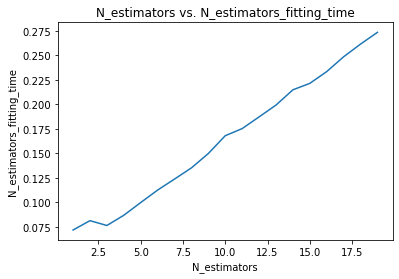

In [16]:
plt.plot(N_estimators, N_estimators_fitting_time)
plt.xlabel('N_estimators') 
plt.ylabel('N_estimators_fitting_time') 
plt.title('N_estimators vs. N_estimators_fitting_time')  
plt.show()

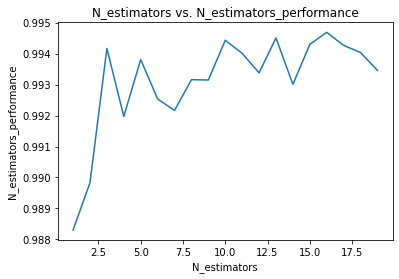

In [17]:
plt.plot(N_estimators, N_estimators_performance)
plt.xlabel('N_estimators') 
plt.ylabel('N_estimators_performance') 
plt.title('N_estimators vs. N_estimators_performance')  
plt.show()

### **2- criterion:** The function to measure the quality of a split.

In [18]:
RF_mae = RandomForestRegressor(n_estimators=5, criterion='mae')

RF_mae_fitting_time_start = time.perf_counter()
RF_mae_scores = cross_val_score(RF_mae, X_train, y_train, cv=Cross_Validation)
RF_mae_fitting_time_end = time.perf_counter()
print('Random Forest regression with mae criterion:')
print('Fitting time: ', RF_mae_fitting_time_end - RF_mae_fitting_time_start)
print('Performance: ', RF_mae_scores.mean())

RF_mse = RandomForestRegressor(n_estimators=5, criterion='mse')

RF_mse_fitting_time_start = time.perf_counter()
RF_mse_scores = cross_val_score(RF_mse, X_train, y_train, cv=Cross_Validation)
RF_mse_fitting_time_end = time.perf_counter()
print('Random Forest regression with mse criterion:')
print('Fitting time: ',RF_mse_fitting_time_end - RF_mse_fitting_time_start)
print('Performance: ', RF_mse_scores.mean())

Random Forest regression with mae criterion:
Fitting time:  0.17978570000000005
Performance:  0.9934542592294815
Random Forest regression with mse criterion:
Fitting time:  0.09959380000000007
Performance:  0.9922939510376498


### **3- max_features:** The number of features to consider when looking for the best split

In [19]:
RF_auto = RandomForestRegressor(n_estimators=5, criterion='mse', max_features="auto")
RF_auto_fitting_time_start = time.perf_counter()
RF_auto_scores = cross_val_score(RF_auto, X_train, y_train, cv=Cross_Validation)
RF_auto_fitting_time_end = time.perf_counter()
print('Random Forest regression with max_features = n:')
print('Fitting time: ', RF_auto_fitting_time_end - RF_auto_fitting_time_start)
print('Performance: ', RF_auto_scores.mean())

RF_sqrt = RandomForestRegressor(n_estimators=5, criterion='mse', max_features="sqrt")
RF_sqrt_fitting_time_start = time.perf_counter()
RF_sqrt_scores = cross_val_score(RF_sqrt, X_train, y_train, cv=Cross_Validation)
RF_sqrt_fitting_time_end = time.perf_counter()
print('Random Forest regression with max_features = sqrt(n):')
print('Fitting time: ', RF_sqrt_fitting_time_end - RF_sqrt_fitting_time_start)
print('Performance: ', RF_sqrt_scores.mean())

RF_log2 = RandomForestRegressor(n_estimators=5, criterion='mse', max_features="log2")
RF_log2_fitting_time_start = time.perf_counter()
RF_log2_scores = cross_val_score(RF_log2, X_train, y_train, cv=Cross_Validation)
RF_log2_fitting_time_end = time.perf_counter()
print('Random Forest regression with max_features = log2(n):')
print('Fitting time: ', RF_log2_fitting_time_end - RF_log2_fitting_time_start)
print('Performance: ', RF_log2_scores.mean())

Random Forest regression with max_features = n:
Fitting time:  0.10507160000000049
Performance:  0.993427621281293
Random Forest regression with max_features = sqrt(n):
Fitting time:  0.1042879000000001
Performance:  0.9449279213000432
Random Forest regression with max_features = log2(n):
Fitting time:  0.0933900999999997
Performance:  0.935839313373636


## Getting the final model

In [20]:
RF_Model = RandomForestRegressor(n_estimators=5, criterion='mse', max_features="auto")

RF_fitting_start_time = time.perf_counter()  #start the fitting time counter
#fit the training set into the random fores regression model & evaluate the performance using cross validation scores
RF_performance_scores = cross_val_score(RF_Model, X_train, y_train, cv=Cross_Validation) 

RF_fitting_end_time = time.perf_counter() #stop the fitting time counter

RF_implementation_end_time = time.perf_counter() #stop the implemntation time counter

print('the performance scores of the random forest regression:')
print(RF_performance_scores)

#get the average of the scores
RF_average_performance = RF_performance_scores.mean()

#get the implmentation time 
RF_implementation_time = RF_implementation_end_time - RF_implementation_start_time

#get the fitting time
RF_fitting_time = RF_fitting_end_time - RF_fitting_start_time

print('Random Forest Regression Results: ')
print('Implementation time =', RF_implementation_time)
print('Fitting time = ', RF_fitting_time)
print('Performance = ', RF_average_performance)

the performance scores of the random forest regression:
[0.99761822 0.99139163 0.9964383  0.9920859  0.98543433 0.9973221
 0.99443778 0.99184143 0.99405372 0.98937542]
Random Forest Regression Results: 
Implementation time = 4.2592351
Fitting time =  0.1038553000000002
Performance =  0.9929998832251329


# Applying K-Nearest Neighbors Regression

## Choosing the suitable hyperparameters 

In [21]:
KNN_implementation_start_time = time.perf_counter()    #start the implementation time counter

### 1- **n_neighbors** : Number of neighbors to use by default for kneighbors queries

In [22]:
#getting the maximum number of neighbors that could be used
max_possible_k = math.floor(0.9 * len(X_train))
print(max_possible_k)

221


As it is very hard to compute the results of the regression models by changing the k from 1 till max_possible_k, we can use for loop with large step. 

In [23]:
N_neighbors = []
N_neighbors_fitting_time = []
N_neighbors_performance = []

#try different values of N_neighbors
mx = max_possible_k
step = math.floor(mx/10) 
for i in range(1, mx, step):  
  KNN_i = neighbors.KNeighborsRegressor(n_neighbors = i)
  fitting_time_start_i = time.perf_counter()
  KNN_Scores_i = cross_val_score(KNN_i, X_train, y_train, cv=Cross_Validation)
  fitting_time_end_i = time.perf_counter()

  fitting_time_i = fitting_time_end_i - fitting_time_start_i
  performance_i = KNN_Scores_i.mean()

  N_neighbors.append(i)
  N_neighbors_fitting_time.append(fitting_time_i)
  N_neighbors_performance.append(performance_i)

print('the fitting time of different N_neighbors:')
print(N_neighbors_fitting_time)

print('the performance scores of different N_neighbors:')
print(N_neighbors_performance)

the fitting time of different N_neighbors:
[0.042419399999999996, 0.04924189999999928, 0.03888649999999938, 0.03719649999999941, 0.037982899999999375, 0.03542320000000032, 0.03494229999999998, 0.038126000000000104, 0.03573720000000069, 0.03623469999999962]
the performance scores of different N_neighbors:
[0.6329262355500526, 0.12767278692088108, 0.06322288054239274, 0.03344175148090147, 0.02753597500101639, 0.000514663641269808, 0.0002825865909876435, -0.00011296985781958924, -0.01576019164673508, -0.0011229783060060505]


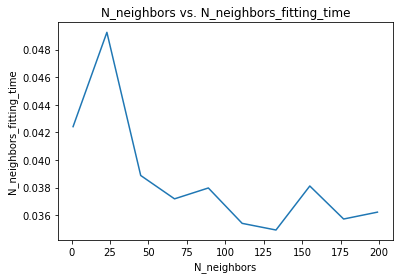

In [24]:
plt.plot(N_neighbors, N_neighbors_fitting_time)
plt.xlabel('N_neighbors') 
plt.ylabel('N_neighbors_fitting_time') 
plt.title('N_neighbors vs. N_neighbors_fitting_time')  
plt.show()

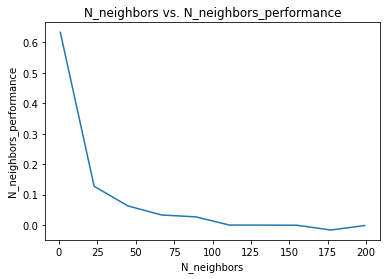

In [25]:
plt.plot(N_neighbors, N_neighbors_performance)
plt.xlabel('N_neighbors') 
plt.ylabel('N_neighbors_performance') 
plt.title('N_neighbors vs. N_neighbors_performance')  
plt.show()

we can notice that the performance decreases when the k increases. So we can repeat the same loop by taking the first part and decreasing the step to have better results.

In [26]:
N_neighbors = []
N_neighbors_fitting_time = []
N_neighbors_performance = []

#try different values of N_neighbors
mx = math.floor(max_possible_k/10)
step = math.floor(mx/10) 
for i in range(1, mx, step):  
  KNN_i = neighbors.KNeighborsRegressor(n_neighbors = i)
  fitting_time_start_i = time.perf_counter()
  KNN_Scores_i = cross_val_score(KNN_i, X_train, y_train, cv=Cross_Validation)
  fitting_time_end_i = time.perf_counter()

  fitting_time_i = fitting_time_end_i - fitting_time_start_i
  performance_i = KNN_Scores_i.mean()

  N_neighbors.append(i)
  N_neighbors_fitting_time.append(fitting_time_i)
  N_neighbors_performance.append(performance_i)

print('the fitting time of different N_neighbors:')
print(N_neighbors_fitting_time)

print('the performance scores of different N_neighbors:')
print(N_neighbors_performance)

the fitting time of different N_neighbors:
[0.04664980000000085, 0.03644180000000041, 0.03680619999999912, 0.03682309999999944, 0.03761290000000095, 0.03669739999999955, 0.03672079999999944, 0.03656190000000059, 0.03664350000000027, 0.03741789999999945, 0.03652499999999925]
the performance scores of different N_neighbors:
[0.6329262355500526, 0.517679153368545, 0.338886880583615, 0.2262183628272533, 0.24131108209837576, 0.2782279889571254, 0.28227357211457565, 0.24868137249362224, 0.19224346941351678, 0.14857690361237874, 0.131343923619376]


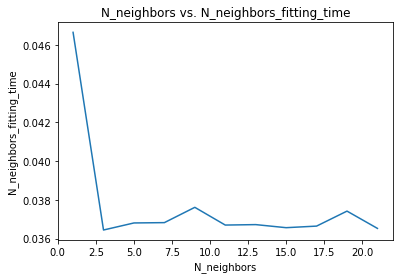

In [27]:
plt.plot(N_neighbors, N_neighbors_fitting_time)
plt.xlabel('N_neighbors') 
plt.ylabel('N_neighbors_fitting_time') 
plt.title('N_neighbors vs. N_neighbors_fitting_time')  
plt.show()

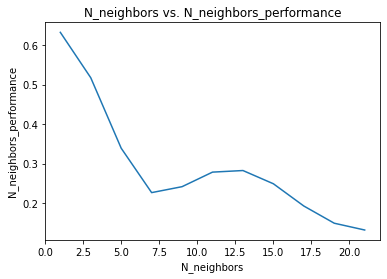

In [28]:
plt.plot(N_neighbors, N_neighbors_performance)
plt.xlabel('N_neighbors') 
plt.ylabel('N_neighbors_performance') 
plt.title('N_neighbors vs. N_neighbors_performance')  
plt.show()

In [29]:
#getting the information of best performance:
KNN_best_k_performance = max(N_neighbors_performance)
KNN_best_k_index = N_neighbors_performance.index(KNN_best_k_performance)
KNN_best_k = N_neighbors[KNN_best_k_index]
KNN_best_k_fitting_time = N_neighbors_fitting_time[KNN_best_k_index]

print('Best K:', KNN_best_k)
print('Best K performance:', KNN_best_k_performance)
print('Best K fitting time:', KNN_best_k_fitting_time)

Best K: 1
Best K performance: 0.6329262355500526
Best K fitting time: 0.04664980000000085


### **2- weights:** weight function used in prediction

In [30]:
KNN_uniform = neighbors.KNeighborsRegressor(n_neighbors = KNN_best_k, weights='uniform')

KNN_uniform_fitting_time_start = time.perf_counter()
KNN_uniform_scores = cross_val_score(KNN_uniform, X_train, y_train, cv=Cross_Validation)
KNN_uniform_fitting_time_end = time.perf_counter()
print('K-Nearest Neighbors regression with uniform weight:')
print('Fitting time: ', KNN_uniform_fitting_time_end - KNN_uniform_fitting_time_start)
print('Performance: ', KNN_uniform_scores.mean())

KNN_distance = neighbors.KNeighborsRegressor(n_neighbors = KNN_best_k, weights='distance')

KNN_distance_fitting_time_start = time.perf_counter()
KNN_distance_scores = cross_val_score(KNN_distance, X_train, y_train, cv=Cross_Validation)
KNN_distance_fitting_time_end = time.perf_counter()
print('K-Nearest Neighbors regression with distance weight:')
print('Fitting time: ', KNN_distance_fitting_time_end - KNN_distance_fitting_time_start)
print('Performance: ', KNN_distance_scores.mean())

K-Nearest Neighbors regression with uniform weight:
Fitting time:  0.0473081999999998
Performance:  0.6329262355500526
K-Nearest Neighbors regression with distance weight:
Fitting time:  0.04255599999999937
Performance:  0.6329262355500526


## Getting the final model

In [31]:
KNN_Model = neighbors.KNeighborsRegressor(n_neighbors = KNN_best_k, weights='distance')

KNN_fitting_start_time = time.perf_counter()  #start the fitting time counter
#fit the training set into the K-Nearest Neighbors regression model & evaluate the performance using cross validation scores
KNN_performance_scores = cross_val_score(KNN_Model, X_train, y_train, cv=Cross_Validation) 

KNN_fitting_end_time = time.perf_counter() #stop the fitting time counter

KNN_implementation_end_time = time.perf_counter() #stop the implemntation time counter

print('the performance scores of the random forest regression:')
print(KNN_performance_scores)

#get the average of the scores
KNN_average_performance = KNN_performance_scores.mean()

#get the implmentation time 
KNN_implementation_time = KNN_implementation_end_time - KNN_implementation_start_time

#get the fitting time
KNN_fitting_time = KNN_fitting_end_time - KNN_fitting_start_time

print('K-Nearest Neighbors Regression Results: ')
print('Implementation time =', KNN_implementation_time)
print('Fitting time = ', KNN_fitting_time)
print('Performance = ', KNN_average_performance)

the performance scores of the random forest regression:
[0.74482129 0.52332642 0.43470465 0.21913199 0.75945428 0.80289575
 0.83356984 0.78392522 0.80819368 0.41923923]
K-Nearest Neighbors Regression Results: 
Implementation time = 1.6778560000000002
Fitting time =  0.04417129999999858
Performance =  0.6329262355500526


# Comparision of models

In [32]:
results_table = [['Parameters', 'Implementation time', 'Fitting time', 'Performance'],
                 ['Linear Regression', LR_implementation_time, LR_fitting_time, LR_average_performance],
                 ['Random Forest Regression', RF_implementation_time, RF_fitting_time, RF_average_performance],
                 ['KNN Regression', KNN_implementation_time, KNN_fitting_time, KNN_average_performance]]
print(tabulate(results_table, headers='firstrow', tablefmt='fancy_grid'))


╒══════════════════════════╤═══════════════════════╤════════════════╤═══════════════╕
│ Parameters               │   Implementation time │   Fitting time │   Performance │
╞══════════════════════════╪═══════════════════════╪════════════════╪═══════════════╡
│ Linear Regression        │             0.0494309 │      0.0493514 │      0.625262 │
├──────────────────────────┼───────────────────────┼────────────────┼───────────────┤
│ Random Forest Regression │             4.25924   │      0.103855  │      0.993    │
├──────────────────────────┼───────────────────────┼────────────────┼───────────────┤
│ KNN Regression           │             1.67786   │      0.0441713 │      0.632926 │
╘══════════════════════════╧═══════════════════════╧════════════════╧═══════════════╛


# Testing

## choose and test Linear regression

In [33]:
LR_Model.fit(X_train, y_train)
LR_y_pred = LR_Model.predict(X_test)
print('Linear Regression MSE: ', metrics.mean_squared_error(y_test, LR_y_pred))

Linear Regression MSE:  54.009119041137104


## choose and test random forest regression

In [34]:
RF_Model.fit(X_train, y_train)
RF_y_pred = RF_Model.predict(X_test)
print('Random Forest Regression MSE: ', metrics.mean_squared_error(y_test, RF_y_pred))

Random Forest Regression MSE:  0.6761338709677411


## choose and test K-Nearest Neighbors regression

In [35]:
KNN_Model.fit(X_train, y_train)
KNN_y_pred = KNN_Model.predict(X_test)
print('Random Forest Regression MSE: ', metrics.mean_squared_error(y_test, KNN_y_pred))

Random Forest Regression MSE:  31.32443548387096
